# Introduction
By: Liam Woodward, low21

We will be analyzing the Covid-19 data for each neighborhood as a metric of the best neighborhood in Pittsburgh. As Covid-19 will not be disappearing anytime within the next few months, any neighborhood that purports to be the best in the city must have a low number of Covid-19 cases and deaths, and extensive Covid-19 testing.

First, we do some initial setup by importing pandas and numpy.

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
covid_data = pd.read_csv("https://data.wprdc.org/datastore/dump/0f214885-ff3e-44e1-9963-e9e9062a04d1",
                         index_col="neighborhood_municipality",
                         parse_dates=True)

The data describes the number of individuals tested, the number of cases, and the number of deaths. This is exactly what we wanted to analyze as a metric of each neighborhood's Covid-19 status. Here is an example of some of the data:

In [4]:
covid_data.head(5)

,indv_tested,cases,deaths,update_date
neighborhood_municipality,,,,
Aleppo,383,12,0,2020-11-09
Allegheny Center (Pittsburgh),219,21,0,2020-11-09
Allegheny West (Pittsburgh),108,3,0,2020-11-09
Allentown (Pittsburgh),356,33,0,2020-11-09
Arlington (Pittsburgh),287,28,1,2020-11-09


The first metric we wil be analyzing is the number of cases for each neighborhood. This is possibly the most important factor, perhaps even above deaths, for each neighborhood: deaths scale with cases, so the more cases, the more deaths. While most neighborhoods at least have one case, there are a handful that have none.

In [5]:
covid_data[['cases']].sort_values('cases').head(10)

,cases
neighborhood_municipality,
Chateau (Pittsburgh),0
Undefined (Pittsburgh),0
Trafford,0
Mt. Oliver (Pittsburgh),0
St. Clair (Pittsburgh),0
Arlington Heights (Pittsburgh),1
Mcdonald,3
Rosslyn Farms,3
Chartiers City (Pittsburgh),3


The second metric we will be analyzing is the number of deaths. A neighborhood with a high number of Covid-19 deaths will struggle to call itself the best in the city, thus, the best neighborhood should have few or no deaths. As many neighborhoods have very few cases, there are many neighborhoods that have no deaths.

In [6]:
covid_data[['deaths']].sort_values('deaths').head(10)

,deaths
neighborhood_municipality,
Aleppo,0
Lower Lawrenceville (Pittsburgh),0
Marshall,0
Marshall-Shadeland (Pittsburgh),0
Mcdonald,0
Mckees rocks,0
Middle Hill (Pittsburgh),0
Mt. Oliver (Pittsburgh),0
New Homestead (Pittsburgh),0


The third and last metric we will be analyzing is the number of individuals tested. This metric is, in my opinion, the least important. A neighborhood that has more actual cases will be more likely to have more tests as contact-tracing goes underway and networks of people who have interacted with an infected individual receive tests. In addition, someone with symptoms will be likely to the doctor and have a test taken. 

However, there should still be testing occurring even if there are few cases in a neighborhood. Thus, while this is the least important metric in my opinion, it should still be considered.

In [7]:
covid_data[['indv_tested']].sort_values('indv_tested').tail(10).iloc[::-1]

,indv_tested
neighborhood_municipality,
Mount Lebanon,9939
Penn Hills,7092
Ross,5725
Monroeville,5695
McCandless,5128
Bethel Park,4974
Baldwin Borough,4289
Shaler,4253
Plum,4151


In accordance with the comparative importance of these three metrics for Covid-19 described above, we will assign a score from 0 to 1 to each neighborhood. The number of cases will constitute 50% of this score; the number of deaths, 40%; and the number of tests, 10%.

The score for each neighborhood's cases is scaled so that the neighborhood with the most cases has a score of 0, and a neighborhood with no cases has the maximum score. The score for each neighborhood's deaths is calculated in the same way. The score for each neighborhood's testing is calculated so that the neighborhood with the largest number of tests receives the highest score.

In [8]:
cases_max = covid_data['cases'].max()
deaths_max = covid_data['deaths'].max()
testing_max = covid_data['indv_tested'].max()

In [9]:
scores = {}
for index, row in covid_data.iterrows():
    cases_score = 0.5 * (1 - (row['cases'] / cases_max)) # 50%
    deaths_score = 0.4 * (1 - (row['deaths'] / deaths_max)) # 40%
    testing_score = 0.1 * (row['indv_tested'] / testing_max) # 10%
    scores[index] = cases_score + deaths_score + testing_score
scores

{'Aleppo': 0.8951954977309641,
 'Allegheny Center (Pittsburgh)': 0.8870519258385241,
 'Allegheny West (Pittsburgh)': 0.8989221262689419,
 'Allentown (Pittsburgh)': 0.879772325471088,
 'Arlington (Pittsburgh)': 0.8735946851552043,
 'Arlington Heights (Pittsburgh)': 0.890740965778696,
 'Aspinwall': 0.8905072021582737,
 'Avalon': 0.8392481147989751,
 'Baldwin Borough': 0.33406232564095534,
 'Baldwin Township': 0.8729737981775411,
 'Banksville (Pittsburgh)': 0.7353122880741354,
 'Bedford Dwellings (Pittsburgh)': 0.8681284841864377,
 'Beechview (Pittsburgh)': 0.8510047654327763,
 'Bell Acres': 0.8946262242972174,
 'Bellevue': 0.8407343235293734,
 'Beltzhoover (Pittsburgh)': 0.8726618955716452,
 'Ben Avon': 0.8901118903231792,
 'Ben Avon Heights': 0.8971169153481258,
 'Bethel Park': 0.6842444103838611,
 'Blawnox': 0.8815383362319673,
 'Bloomfield (Pittsburgh)': 0.841889813577106,
 'Bluff (Pittsburgh)': 0.849260140536929,
 'Bon Air (Pittsburgh)': 0.896546335242381,
 'Brackenridge': 0.86316487

In [10]:
scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=['score'])

According to these scores, the following neighborhoods are the best neighborhoods in Pittsburgh according to this Covid-19 metric.

<AxesSubplot:>

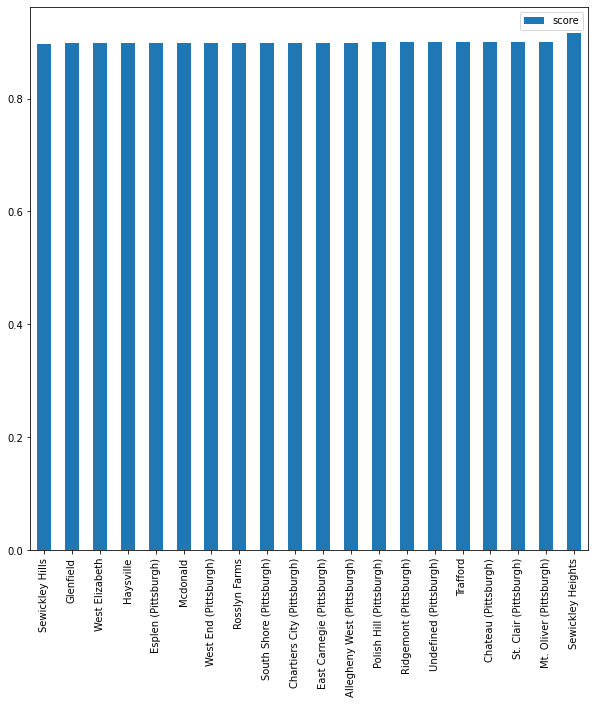

In [11]:
scores_df.sort_values('score').tail(20).plot(kind="bar",figsize=(10,10))

By a fair margin, Sewickley Heights has handled Covid-19 the best out of any neighborhood in Pittsburgh.

Out of curiosity, as I'm currently living on campus, here is the score for the different Oakland neighborhoods, compared to the top few neighborhoods

In [12]:
scores_df[['Oakland' in s for s in scores_df.index]]

,score
Central Oakland (Pittsburgh),0.728550
North Oakland (Pittsburgh),0.854068
South Oakland (Pittsburgh),0.826360
West Oakland (Pittsburgh),0.849521


In [13]:
scores_df.sort_values('score').tail(5).iloc[::-1]

,score
Sewickley Heights,0.916506
Mt. Oliver (Pittsburgh),0.900584
St. Clair (Pittsburgh),0.900272
Chateau (Pittsburgh),0.900221
Trafford,0.900050


As you can see, most parts of Oakland have done comparably well to the top few neighborhoods with the exception of Central Oakland, which has definitely struggled a bit more.

# Conclusion
My personal favorite neighborhood since moving on campus is definitely Oakland. The "best neighborhood" from my data, however, is Sewickley Heights. I'm not particularly surprised or disappointed by this outcome; I didn't expect Oakland to win on this metric, and apparently Sewickley Heights is one of the wealthiest neighborhoods in the state and has a relatively low population, so this outcome is not particularly surprising.